In [69]:
import os, sys, time
import tifffile as tif
sys.path.append("/home/emilyjanedennis/Desktop/GitHub/rat_BrainPipe")
from tools.utils.io import makedir
from tools.registration.register import change_interpolation_order, transformix_command_line_call
from tools.registration.transform_list_of_points import modify_transform_files
from scipy.ndimage.interpolation import zoom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

Purpose: to compare two separate annotations files and outputs from calculating_vox-diffs... notebook

Also using this to transform either the spreadsheets that are output or the atlases themselves to 'pra labels'

In [70]:
src = "/home/emilyjanedennis/Desktop/for_registration_to_lightsheet"
pralabels = os.path.join(src,"labels/labels_202009.csv")

In [71]:
MRIrannfile = os.path.join(src,"tiffs/WHS_SD_rat_atlas_v3_annotation.tif")
valdesannfile = os.path.join(src,"tiffs/valdes-hernandes_labels.tif")
chonannfile = os.path.join(src,"tiffs/Chon-Paxinos-annotations-1.tif")
pmaannfile = os.path.join(src,"tiffs/PMA_annotation.tif")

mrioutfile = os.path.join(src,"tiffs/MRIr_in_pra-specific.tif")
valdesoutfile = os.path.join(src,"tiffs/valdes_in_pra-specific.tif")
chonoutfile = os.path.join(src,"tiffs/chon_in_pra-specific.tif")
pmaoutfile = os.path.join(src,"tiffs/pma_in_pra-specific.tif")

In [81]:
MRIr = tif.imread(MRIrannfile)
print("read MRIr")
valdes = tif.imread(valdesannfile)
print("read Valdes-Hernandes file")
chon = tif.imread(chonannfile)
print("read Chon file")
pma = tif.imread(pmaannfile)
print("read PMA")

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


read MRIr
read Valdes-Hernandes file
read Chon file
read PMA


In [82]:
df = pd.read_csv(pralabels)
where_are_NaNs = np.isnan(df.specific)
df.specific[where_are_NaNs] = 0
df['praid']=df['parent']+df['specific']

<ipython-input-82-91bc55bbb01a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.specific[where_are_NaNs] = 0


In [83]:
chontopra = df[df.source=="C"]
mritopra = df[df.source=="W"]
pmatopra = df[df.source=="PMA"]
vhtopra = df[df.source=="V"]

In [84]:
pmatopra=pmatopra.drop_duplicates('id')
vhtopra=vhtopra.drop_duplicates('id')
chontopra=chontopra.drop_duplicates('id')
mritopra=mritopra.drop_duplicates('id')

In [85]:
for i in chontopra['id']:
    chon[chon==i]=chontopra.praid[chontopra.id==i]
    
print('done with Chon')

for i in mritopra['id']:
    MRIr[MRIr==i]=mritopra.praid[mritopra.id==i]

print('done with mri')

for i in pmatopra['id']:
    pma[pma==i]=pmatopra.praid[pmatopra.id==i]
print('done with pma')

for i in vhtopra['id']:
    valdes[valdes==i]=vhtopra.praid[vhtopra.id==i]
print('done with valdes')    

done with Chon
done with mri
done with pma
done with valdes


NameError: name 'size' is not defined

In [86]:
tif.imsave(chonoutfile,chon)
tif.imsave(mrioutfile,MRIr)
tif.imsave(valdesoutfile,valdes)
tif.imsave(pmaoutfile,pma)

In [103]:
testdf=df
testdf=testdf.drop_duplicates('praid')


In [114]:
newdf=testdf[testdf.columns[[1,3,4,22]]]


In [117]:
newdf.insert(4,'chon',0)
newdf.insert(5,'mri',0)
newdf.insert(6,'valdes',0)
newdf.insert(7,'pma',0)
newdf.insert(8,'pra',0)


In [126]:
for i in newdf.praid:
    newdf.chon[newdf.praid==i]=np.size(chon[chon==i])/np.size(chon)
    newdf.mri[newdf.praid==i]=np.size(MRIr[MRIr==i])/np.size(MRIr)
    newdf.valdes[newdf.praid==i]=np.size(valdes[valdes==i])/np.size(valdes)
    newdf.pma[newdf.praid==i]=np.size(pma[pma==i])/np.size(pma)
    

<ipython-input-126-1a4e55880089>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.chon[newdf.praid==i]=np.size(chon[chon==i])/np.size(chon)
/home/emilyjanedennis/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-126-1a4e55880089>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf.mri[newdf.praid==i]=np.size(MRIr[MRIr==

In [127]:
newdf

,parent,desc,spec_desc,praid,chon,mri,valdes,pma,pra
0,1000.0,amygdala,NaN,1000.0,0.000000,0.000000,0.008453,0.008169,0
66,0.0,blood,NaN,0.0,0.607871,0.691552,0.657683,0.626188,0
70,2000.0,brainstem,NaN,2000.0,0.000000,0.030399,0.000000,0.000000,0
72,3000.0,cerebellum,NaN,3000.0,0.057260,0.053080,0.057562,0.045979,0
194,20000.0,cortex,auditory cortex,20000.0,0.055561,0.107349,0.045075,0.072601,0
200,20000.0,cortex,cingulate - mpfc - PrL,20213.0,0.000000,0.000000,0.000000,0.000418,0
212,20000.0,cortex,ectorhinal,20300.0,0.000000,0.000000,0.001887,0.000000,0
220,20000.0,cortex,entorhinal,20400.0,0.002846,0.000000,0.000000,0.000000,0
247,20000.0,cortex,entorhinal - lateral,20401.0,0.003237,0.000000,0.004122,0.000000,0
276,20000.0,cortex,entorhinal - medial,20402.0,0.001261,0.000000,0.000712,0.000000,0


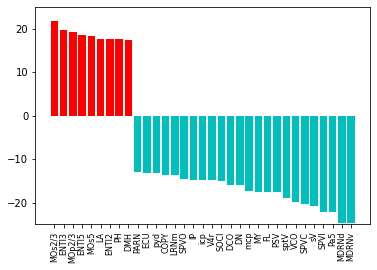

In [54]:
plt.bar(df2p.abbr,df2p.percent,color='r')
plt.bar(df2m.abbr,df2m.percent,color='c')
plt.xticks(rotation=90,fontsize=8)
plt.ylim([-25,25])
plt.show()